In [79]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [80]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [81]:
df.head()

,subject,activity,raw acc data,magnitude,max,min,std,skew,kurtosis,mean,...,z skew,x kurtosis,y kurtosis,z kurtosis,x std,y std,z std,xy mean,yz mean,xz mean
0,gia,walking,"[[-9.8000000000000007, 0.29999999999999999, -1...","[9.918669265581952, 9.918669265581952, 9.91866...",14.342245,7.056203,1.153909,0.765104,4.308712,10.103423,...,-0.958296,4.834692,4.085765,1.460693,1.204284,1.099321,0.682528,-5.076834,-0.512111,16.161558
1,gia,walking,"[[-10.9, 0.20000000000000001, -1.2], [-9.90000...","[10.96767979109529, 10.144456614328833, 10.144...",17.623564,5.989157,2.539697,0.793941,0.369980,10.294204,...,-0.456637,1.420196,1.369993,-0.315002,2.404669,2.229920,1.796619,-3.229899,-0.526181,23.154322
2,gia,walking,"[[-8.5, -4.4000000000000004, -3.5], [-8.5, -4....","[10.191172650877817, 10.191172650877817, 10.19...",19.783074,7.156815,2.980663,1.883973,3.243430,10.325923,...,-1.361813,1.634786,0.683003,2.046856,2.649007,2.882193,2.197824,-3.538241,-1.346332,25.069799
3,gia,walking,"[[-7.2000000000000002, 0.0, -1.2], [-7.2000000...","[7.299315036357863, 7.299315036357863, 7.29931...",20.592474,6.953416,3.096813,1.265939,1.202015,10.695082,...,-0.832902,2.479632,1.038908,0.454232,2.830061,2.743193,2.133902,-3.714523,-0.479246,24.624523
4,gia,walking,"[[-7.2999999999999998, 3.1000000000000001, -2....","[8.179242018671413, 8.275868534480233, 8.27586...",22.588935,7.097183,2.874046,2.321100,6.854679,10.447635,...,-0.821070,3.959701,1.671694,0.469151,2.539729,2.612113,1.971313,3.635025,1.940151,27.191206


In [113]:
Y = df['activity']
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std',  'xy mean', 'yz mean', 'xz mean']
X = df[features]
groups = ['subject']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print("Train Set Size: ", len(X_train))
print("Test Set Size: ", len(X_test))

Train Set Size:  808
Test Set Size:  347


Feature ranking:
feature (1, 'max', 0.074772879715919519)
feature (2, 'min', 0.071152955604755166)
feature (3, 'std', 0.066371000502392058)
feature (4, 'skew', 0.063814825788220966)
feature (5, 'mean', 0.05889473894121746)
feature (6, 'median', 0.055489037247620679)
feature (7, 'x max', 0.047430220418698321)
feature (8, 'y max', 0.045090445947521637)
feature (9, 'z max', 0.043706701842782913)
feature (10, 'x min', 0.043524829436590563)
feature (11, 'y min', 0.038369708696991738)
feature (12, 'z min', 0.038115291687134463)
feature (13, 'x mean', 0.037131037675234638)
feature (14, 'y mean', 0.033357324146369952)
feature (15, 'z mean', 0.032597625598454701)
feature (16, 'x median', 0.028602070650471365)
feature (17, 'y median', 0.028266966231831094)
feature (18, 'z median', 0.025373616202786435)
feature (19, 'x skew', 0.024622100673795957)
feature (20, 'y skew', 0.021847952907582267)
feature (21, 'z skew', 0.020396123131957915)
feature (22, 'x std', 0.020212383586244373)
feature (23, 'y s

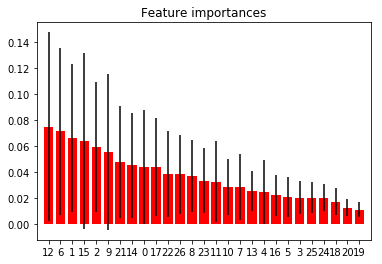

In [109]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = X_train
Y = y_train

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature" , (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

[0.88472622478386165, 19]


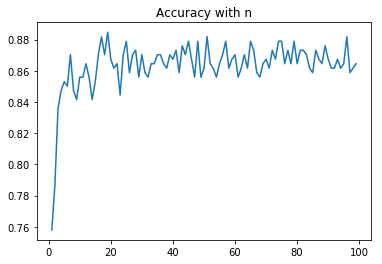

In [112]:
nResult= []
for n in range(1, 100,1):
    model = RandomForestClassifier(n_estimators = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    nResult.append([acc,n])
print(max(nResult))
#plotting peak k value preformance 
nResult = pd.DataFrame(nResult, columns=["n", "acc"])
plt.plot(nResult.acc, nResult.n)
plt.title("Accuracy with n")
plt.show()

In [105]:
model = RandomForestClassifier(n_estimators = 74)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=74, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [106]:
expected = y_test
predicted = model.predict(X_test)

In [107]:
print("Classification Report:")
print(metrics.classification_report(expected, predicted))

Classification Report:
             precision    recall  f1-score   support

   climbing       0.73      0.66      0.69        29
    running       0.97      0.93      0.95        69
    sitting       0.85      0.80      0.82        70
   sleeping       1.00      0.96      0.98        67
   standing       0.77      0.86      0.81        50
    walking       0.83      0.92      0.87        62

avg / total       0.88      0.87      0.87       347



Confusion matrix


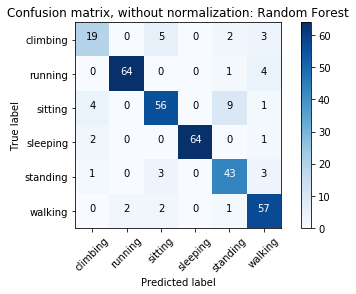

In [108]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization: Random Forest')

plt.show()

In [93]:

# Different models to try
#       Model name ---------------------------------------------------------------------
#      Parameters ------------------------------------------                           |
#     Classifier -----------                               |                           |
#                          |                               |                           |
#                          v                               v                           |
models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
#                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
#                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
          ]

# models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

# models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

# LinearSVC
#models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                          # 'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                           #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
#models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])





models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
                                           }, "Random Forest"])

models_with_best_params = []

# cross-validation strategy
cv = 10 # for 10-folds cross-validation

# Leave One Group Out
logo = LeaveOneGroupOut()
cv = logo.get_n_splits(X_train,y_train,groups)


for model in models:
    clf = GridSearchCV(model[0], model[1], cv = 5)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    best_estimator = clf.best_estimator_
    
    model_with_best_params = [best_estimator, best_params, model[2]]
    
    models_with_best_params.append(model_with_best_params)
    
    print(model[2], ": ")
    print("Best score for ", model[2], ":", clf.best_score_)
    print()
    print("Best parameters for ", model[2], " found on development set:", best_params)
    print()
    print("Best estimator for ", model[2], " model:", best_estimator)
    print()
    print()

    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

print(models_with_best_params)



Random Forest : 
Best score for  Random Forest : 0.900990099009901

Best parameters for  Random Forest  found on development set: {'n_estimators': 150}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.882 (+/-0.037) for {'n_estimators': 10}
0.874 (+/-0.042) for {'n_estimators': 20}
0.884 (+/-0.044) for {'n_estimators': 30}
0.886 (+/-0.051) for {'n_estimators': 40}
0.891 (+/-0.050) for {'n_estimators': 50}
0.894 (+/-0.049) for {'n_estimators': 60}
0.890 (+/-0.047) for {'n_estimators': 70}
0.891 (+/-0.058) for {'n_estimators': 80}
0.892 (+/-0.056) for {'n_estimators': 90}
0.890 (+

In [78]:
for model in models_with_best_params:
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy for Random Forest model is 0.85878962536
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.77273   0.58621   0.66667        29
    running    0.95522   0.92754   0.94118        69
    sitting    0.81818   0.77143   0.79412        70
   sleeping    0.98462   0.95522   0.96970        67
   standing    0.72414   0.84000   0.77778        50
    walking    0.82609   0.91935   0.87023        62

avg / total    0.86163   0.85879   0.85785       347


Confusion matrix:
[[17  0  5  1  2  4]
 [ 0 64  0  0  1  4]
 [ 3  0 54  0 12  1]
 [ 2  1 